<a href="https://colab.research.google.com/github/chaitravi-ce/PyTorch_Tutorials/blob/main/PyTorch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression on MNIST Dataset

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F5C19DC4AD0>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


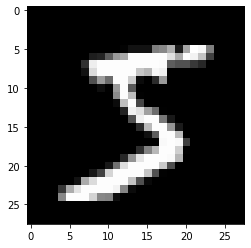

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [8]:
import torchvision.transforms as transforms

In [9]:
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [10]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


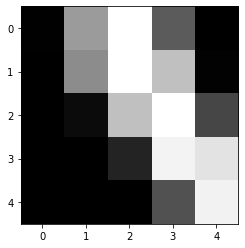

In [11]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [12]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [13]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [14]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [15]:
print(model.weight.shape)
model.weight


torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0330,  0.0092, -0.0183,  ...,  0.0206, -0.0171, -0.0024],
        [ 0.0223, -0.0188, -0.0174,  ..., -0.0039, -0.0186,  0.0026],
        [-0.0021,  0.0009, -0.0125,  ...,  0.0326, -0.0055, -0.0059],
        ...,
        [ 0.0001,  0.0303,  0.0169,  ...,  0.0055, -0.0173,  0.0354],
        [-0.0200, -0.0155, -0.0242,  ...,  0.0089,  0.0114,  0.0128],
        [-0.0252, -0.0302, -0.0041,  ...,  0.0162, -0.0203, -0.0142]],
       requires_grad=True)

In [16]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0150, -0.0193, -0.0034, -0.0326,  0.0329,  0.0205,  0.0305,  0.0207,
         0.0212,  0.0050], requires_grad=True)

In [17]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [18]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [19]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0117,  0.0321, -0.0100,  ...,  0.0283,  0.0011, -0.0333],
         [-0.0190, -0.0133, -0.0213,  ...,  0.0151, -0.0321,  0.0072],
         [-0.0117,  0.0181, -0.0256,  ...,  0.0164,  0.0030, -0.0053],
         ...,
         [ 0.0190,  0.0078,  0.0262,  ...,  0.0220,  0.0339, -0.0084],
         [-0.0139,  0.0237, -0.0171,  ...,  0.0176,  0.0054, -0.0178],
         [ 0.0345,  0.0350,  0.0288,  ..., -0.0190,  0.0286, -0.0125]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0224, -0.0237,  0.0052, -0.0353, -0.0214, -0.0305,  0.0352,  0.0277,
          0.0157,  0.0247], requires_grad=True)]

In [20]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0973, -0.2600,  0.2219, -0.1143,  0.3854,  0.0814,  0.0246, -0.1335,
          0.0953,  0.1072],
        [-0.0584, -0.2447, -0.0346,  0.0848,  0.2128, -0.0364, -0.0680, -0.0089,
          0.3210,  0.1802]])


In [21]:
import torch.nn.functional as F

In [22]:
probs = F.softmax(outputs, dim=1)

# Sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1032, 0.0722, 0.1169, 0.0835, 0.1376, 0.1016, 0.0959, 0.0819, 0.1030,
         0.1042],
        [0.0900, 0.0747, 0.0921, 0.1038, 0.1180, 0.0920, 0.0891, 0.0945, 0.1315,
         0.1142]])
Sum:  1.0


In [23]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 8, 8, 4, 4, 4, 8, 8, 8, 0, 8, 8, 7, 4, 3, 2, 2, 0, 6, 8, 8, 0, 0, 2,
        4, 3, 8, 8, 2, 9, 3, 4, 8, 2, 8, 2, 8, 9, 6, 3, 4, 8, 3, 2, 8, 4, 8, 4,
        2, 0, 8, 7, 9, 4, 4, 0, 2, 8, 8, 8, 4, 8, 0, 3, 3, 8, 2, 2, 4, 8, 3, 7,
        3, 2, 6, 8, 2, 4, 2, 2, 3, 8, 9, 5, 2, 8, 2, 6, 4, 3, 3, 4, 2, 0, 3, 8,
        3, 4, 3, 8, 2, 8, 4, 8, 3, 4, 8, 8, 8, 7, 3, 8, 2, 4, 2, 4, 4, 2, 8, 2,
        8, 0, 8, 0, 3, 2, 4, 2])
tensor([0.1376, 0.1315, 0.1259, 0.1298, 0.1528, 0.1265, 0.1185, 0.1198, 0.1470,
        0.1346, 0.1368, 0.1546, 0.1145, 0.1409, 0.1308, 0.1252, 0.1272, 0.1168,
        0.1370, 0.1341, 0.1121, 0.1453, 0.1131, 0.1381, 0.1218, 0.1370, 0.1236,
        0.1158, 0.1315, 0.1296, 0.1512, 0.1273, 0.1393, 0.1230, 0.1275, 0.1267,
        0.1174, 0.1303, 0.1381, 0.1787, 0.1148, 0.1274, 0.1365, 0.1214, 0.1341,
        0.1249, 0.1327, 0.1155, 0.1164, 0.1180, 0.1265, 0.1287, 0.1266, 0.1563,
        0.1441, 0.1238, 0.1217, 0.1148, 0.1477, 0.1131, 0.1342, 0.1202, 0.1184,
       

In [24]:
labels

tensor([2, 0, 5, 8, 0, 3, 6, 9, 8, 2, 2, 5, 1, 0, 6, 3, 9, 4, 0, 3, 9, 2, 6, 4,
        5, 9, 0, 0, 9, 0, 6, 3, 5, 4, 4, 7, 1, 5, 0, 0, 7, 7, 2, 4, 0, 2, 3, 1,
        9, 8, 3, 5, 9, 6, 7, 8, 9, 5, 5, 1, 2, 9, 0, 6, 5, 3, 8, 7, 0, 1, 5, 1,
        4, 9, 5, 2, 3, 8, 9, 9, 6, 3, 7, 8, 1, 0, 7, 9, 9, 0, 4, 0, 2, 6, 9, 7,
        9, 0, 0, 8, 6, 4, 0, 2, 6, 7, 0, 3, 9, 1, 0, 8, 4, 0, 3, 8, 9, 1, 8, 6,
        9, 1, 0, 8, 8, 4, 7, 1])

In [25]:
outputs[:2]

tensor([[ 0.0973, -0.2600,  0.2219, -0.1143,  0.3854,  0.0814,  0.0246, -0.1335,
          0.0953,  0.1072],
        [-0.0584, -0.2447, -0.0346,  0.0848,  0.2128, -0.0364, -0.0680, -0.0089,
          0.3210,  0.1802]], grad_fn=<SliceBackward>)

In [26]:
torch.sum(preds == labels)

tensor(7)

In [27]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [28]:
accuracy(outputs, labels)

tensor(0.0547)

In [29]:
loss_fn = F.cross_entropy

In [30]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3202, grad_fn=<NllLossBackward>)


In [31]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [32]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [33]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [34]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.08277294039726257, 'val_loss': 2.3277645111083984}

In [35]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9617, val_acc: 0.5974
Epoch [1], val_loss: 1.6896, val_acc: 0.7305
Epoch [2], val_loss: 1.4857, val_acc: 0.7737
Epoch [3], val_loss: 1.3313, val_acc: 0.7922
Epoch [4], val_loss: 1.2126, val_acc: 0.8026


In [36]:
print(history1)

[{'val_loss': 1.9617139101028442, 'val_acc': 0.5974090099334717}, {'val_loss': 1.6896418333053589, 'val_acc': 0.7305182218551636}, {'val_loss': 1.4856771230697632, 'val_acc': 0.7737341523170471}, {'val_loss': 1.3313053846359253, 'val_acc': 0.792227029800415}, {'val_loss': 1.2126381397247314, 'val_acc': 0.8026107549667358}]


In [39]:
history2 = fit(15, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1193, val_acc: 0.8126
Epoch [1], val_loss: 1.0445, val_acc: 0.8182
Epoch [2], val_loss: 0.9833, val_acc: 0.8263
Epoch [3], val_loss: 0.9324, val_acc: 0.8316
Epoch [4], val_loss: 0.8894, val_acc: 0.8349
Epoch [5], val_loss: 0.8525, val_acc: 0.8387
Epoch [6], val_loss: 0.8206, val_acc: 0.8413
Epoch [7], val_loss: 0.7927, val_acc: 0.8448
Epoch [8], val_loss: 0.7680, val_acc: 0.8477
Epoch [9], val_loss: 0.7460, val_acc: 0.8499
Epoch [10], val_loss: 0.7263, val_acc: 0.8524
Epoch [11], val_loss: 0.7085, val_acc: 0.8536
Epoch [12], val_loss: 0.6924, val_acc: 0.8549
Epoch [13], val_loss: 0.6777, val_acc: 0.8565
Epoch [14], val_loss: 0.6642, val_acc: 0.8581


In [41]:
history3 = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6518, val_acc: 0.8589
Epoch [1], val_loss: 0.6403, val_acc: 0.8603
Epoch [2], val_loss: 0.6297, val_acc: 0.8612
Epoch [3], val_loss: 0.6198, val_acc: 0.8622
Epoch [4], val_loss: 0.6106, val_acc: 0.8641
Epoch [5], val_loss: 0.6019, val_acc: 0.8654
Epoch [6], val_loss: 0.5938, val_acc: 0.8662
Epoch [7], val_loss: 0.5862, val_acc: 0.8672
Epoch [8], val_loss: 0.5791, val_acc: 0.8681
Epoch [9], val_loss: 0.5723, val_acc: 0.8680
Epoch [10], val_loss: 0.5659, val_acc: 0.8691
Epoch [11], val_loss: 0.5598, val_acc: 0.8696
Epoch [12], val_loss: 0.5540, val_acc: 0.8702
Epoch [13], val_loss: 0.5485, val_acc: 0.8707
Epoch [14], val_loss: 0.5434, val_acc: 0.8717
Epoch [15], val_loss: 0.5384, val_acc: 0.8725
Epoch [16], val_loss: 0.5336, val_acc: 0.8729
Epoch [17], val_loss: 0.5291, val_acc: 0.8734
Epoch [18], val_loss: 0.5248, val_acc: 0.8737
Epoch [19], val_loss: 0.5206, val_acc: 0.8743


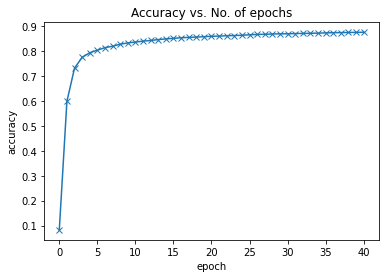

In [42]:
history = [result0] + history1 + history2 + history3
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [43]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

In [44]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


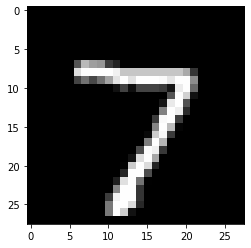

In [45]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


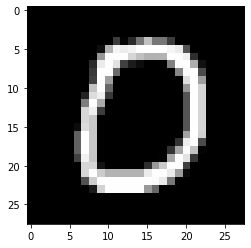

In [46]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 5 , Predicted: 5


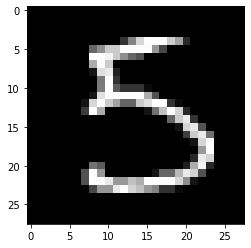

In [47]:
img, label = test_dataset[15]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [48]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8775390386581421, 'val_loss': 0.5008336305618286}

In [49]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [50]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0328,  0.0318,  0.0102,  ...,  0.0313, -0.0255, -0.0329],
                      [-0.0085, -0.0253,  0.0306,  ...,  0.0249,  0.0198, -0.0150],
                      [-0.0240, -0.0103,  0.0196,  ...,  0.0282, -0.0292,  0.0251],
                      ...,
                      [-0.0273,  0.0074,  0.0260,  ...,  0.0032,  0.0343, -0.0015],
                      [ 0.0232,  0.0100, -0.0169,  ..., -0.0321,  0.0159, -0.0067],
                      [-0.0094,  0.0334,  0.0201,  ...,  0.0003,  0.0009,  0.0320]])),
             ('linear.bias',
              tensor([-0.0635,  0.1246, -0.0343, -0.0650,  0.0074,  0.1018, -0.0118,  0.0697,
                      -0.1509, -0.0174]))])

In [51]:
model2 = MnistModel()

In [52]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0211, -0.0353,  0.0082,  ...,  0.0132, -0.0011,  0.0059],
                      [-0.0354,  0.0069,  0.0163,  ...,  0.0206, -0.0282,  0.0001],
                      [ 0.0037,  0.0350, -0.0231,  ...,  0.0058, -0.0056,  0.0211],
                      ...,
                      [-0.0299,  0.0248,  0.0128,  ...,  0.0099, -0.0303,  0.0148],
                      [-0.0009, -0.0310, -0.0159,  ...,  0.0135,  0.0080, -0.0063],
                      [ 0.0065, -0.0209,  0.0043,  ...,  0.0019, -0.0073,  0.0203]])),
             ('linear.bias',
              tensor([-0.0106,  0.0028, -0.0075,  0.0126, -0.0126,  0.0320,  0.0149,  0.0072,
                      -0.0277, -0.0016]))])

In [53]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0328,  0.0318,  0.0102,  ...,  0.0313, -0.0255, -0.0329],
                      [-0.0085, -0.0253,  0.0306,  ...,  0.0249,  0.0198, -0.0150],
                      [-0.0240, -0.0103,  0.0196,  ...,  0.0282, -0.0292,  0.0251],
                      ...,
                      [-0.0273,  0.0074,  0.0260,  ...,  0.0032,  0.0343, -0.0015],
                      [ 0.0232,  0.0100, -0.0169,  ..., -0.0321,  0.0159, -0.0067],
                      [-0.0094,  0.0334,  0.0201,  ...,  0.0003,  0.0009,  0.0320]])),
             ('linear.bias',
              tensor([-0.0635,  0.1246, -0.0343, -0.0650,  0.0074,  0.1018, -0.0118,  0.0697,
                      -0.1509, -0.0174]))])